 # Section 2.2 Probability Mass and Density Function

In [3]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import stats

In [5]:
%matplotlib inline
az.style.use("arviz-darkgrid")
RANDOM_SEED = 8265
np.random.seed(RANDOM_SEED)

# Distribution Mass and Density Functions
Precisely describing the "amount" of probabiity associated with each value

# Revisiting our beta p(conversion) for our A/B test
We've discussed how 
1. We want describe our possible set of beliefs of the conversion rate p(conversion)
2. We can use a Beta distribution for this purpose
3. We can specify the parameter of our Beta function to be Beta(10,3) to highlight a specific belief

What we have not shown yet is how we precisely measure the specific belief. Let;s talk through it

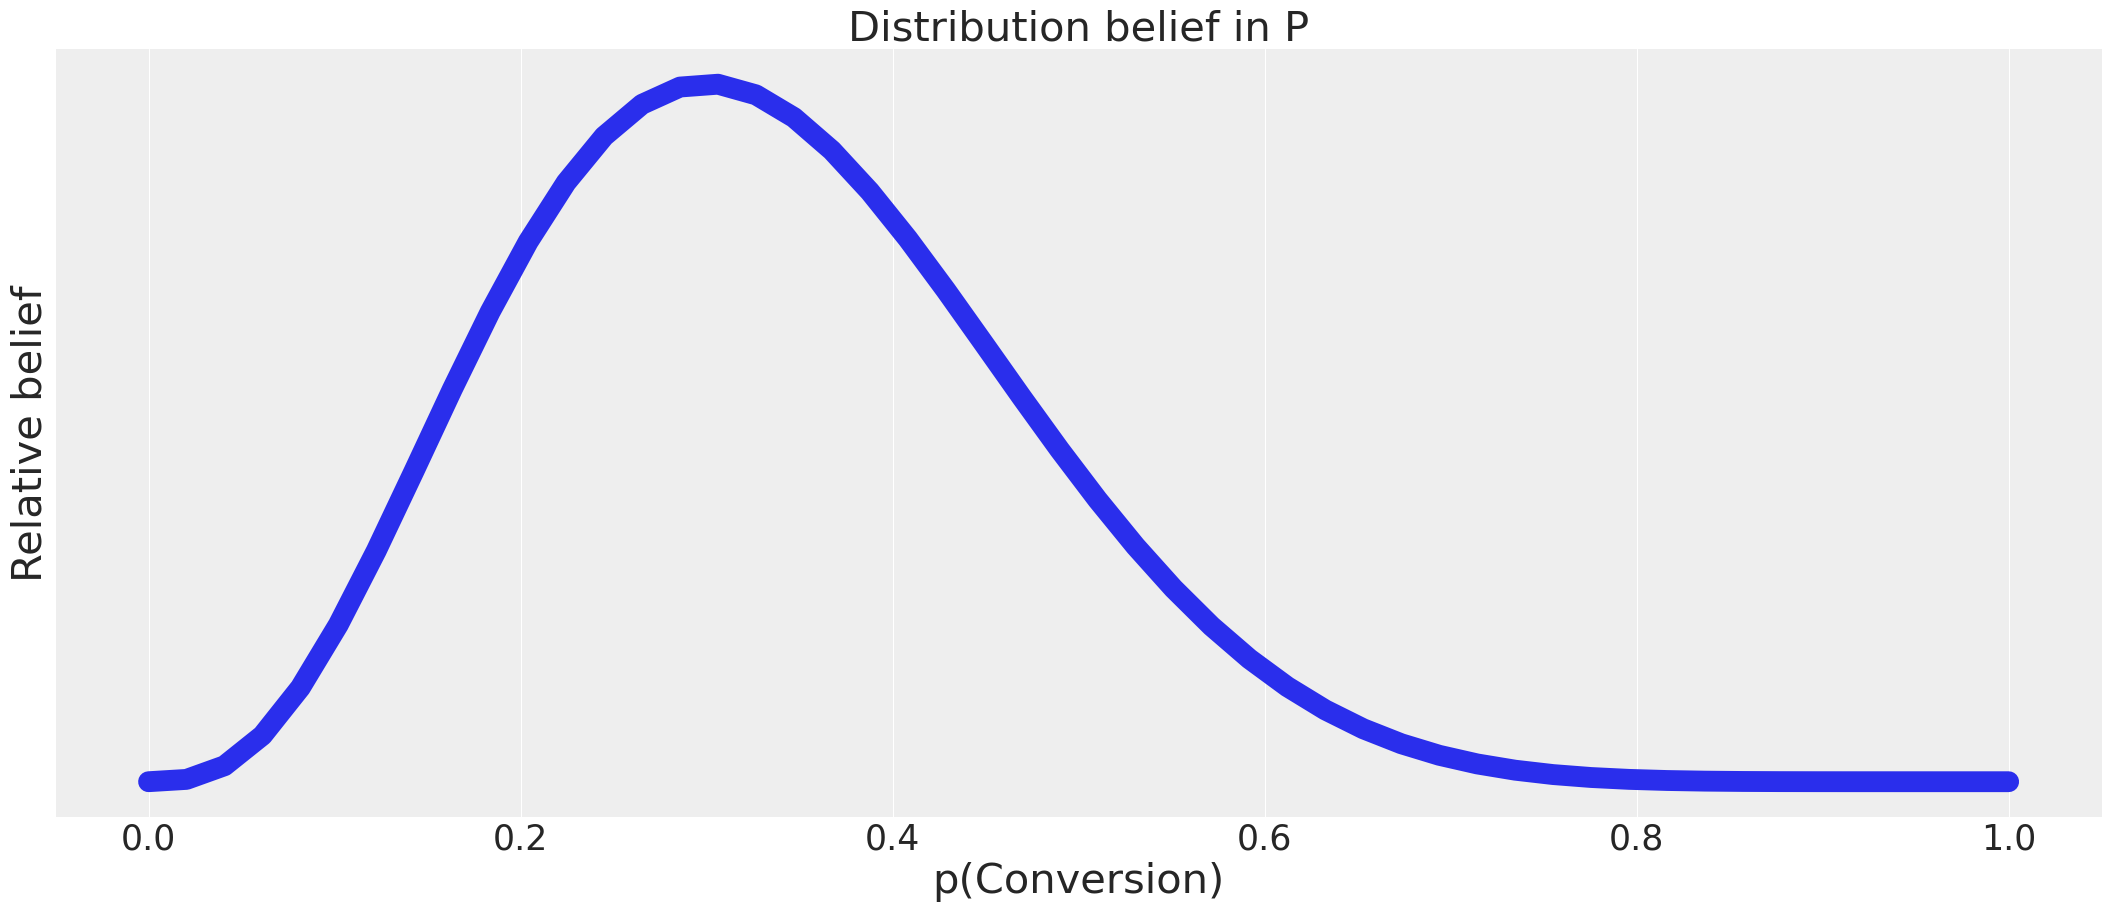

In [50]:
beta_dist = stats.beta(4, 8)
x = np.linspace(0, 1)
y = beta_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)

ax.set_yticks([])
ax.set_title("Distribution belief in P", fontsize=30)
ax.set_xlabel("p(Conversion)", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)

# P value of one person converting
When someone visits our website they either *convert* or *don't convert*  
Let's assume the probabilility of one person converting is precisely **30%**, or .3  
We can use a *Bernoulli* distribution to model this sitation

A Bernoulli distribution only requires one parameter, p, to fully specify

In [ ]:
p = 0.3
bern = stats.bernoulli(p)

# Introduction to Probability Mass Function

Now that we've defined a probability distribution computationally we can use it to determine the amount of *mass* associated with the potential outcomes 0 and 1 using the `.pmf` method

In [30]:
bern.pmf(0), bern.pmf(1)

(0.7, 0.3)

1 represents *conversion*, and 0 represents *didn't convert*

# We can plot the probability mass function too
The vertical height represents the proportion of mass associated with each outcome 0 and 1. 

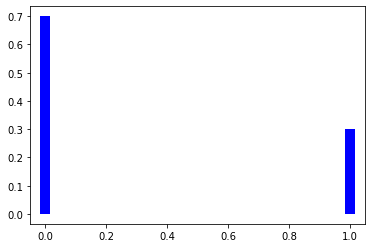

In [39]:
fig, ax = plt.subplots()
potential_outcomes = np.arange(2)
ax.vlines(potential_outcomes, 0, bern.pmf(potential_outcomes), colors='b', linestyles='-', lw=10);

Right now you may be thinking Well "duh", that was obvious. We didn't a computer to tell us that. Let's work through a more complicated case.

# Introducing the Binomial distribution
What if we now are interested in the probability of number of conversions in a group of 10 people, where the probability of success.

In this case there are two parameters are needed to specify the distribution,
* *p* the probability of success on an individual trial 
* *n* the number of trials. 

# Calculating a probability for a single random outcome
What is the chance 4 people convert out of 10, if the probability of conversion is .3?

In [14]:
binom = stats.binom(n=10, p=.3)

number_of_conversions = 4
binom.pmf(number_of_conversions)

0.2001209489999999

The probability mass function here iis telling us that 20% of the *mass* of the distribution is associated with the outcome *4 people convert*

If we instead want to know the probability that 7 people convert we can plug that number in as well, and intuitiively the mass is lower. With a 30% probability of conversion we would expect 7 conversion to be *less likely* than 4 conversions.

In [18]:
number_of_conversions = 7
binom.pmf(number_of_conversions)

0.009001691999999992

# Plotting a binomial probability mass function
Because we defined things computationally we can use our handy plotting tools to visualize the probability mass function.

As we would expect 3 people converted is the most likely.

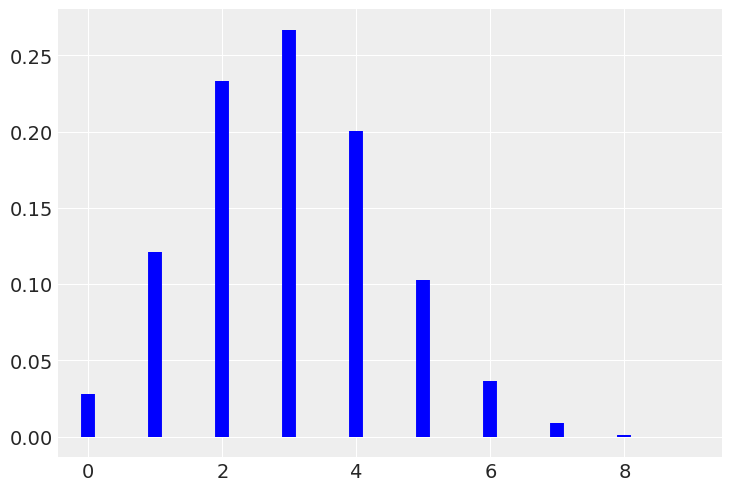

In [13]:
fig, ax = plt.subplots()
potential_outcomes = np.arange(10)
ax.vlines(potential_outcomes, 0, binom.pmf(potential_outcomes), colors='b', linestyles='-', lw=10);

# Discrete distributions versus Continuous distributions
The Bernoulli and Binomial distributions are known as *discrete* outcomes. That's because they measure outcomes that in a fixed set . 

In a Bernoulli distribution that set is 2, either the person converted or they didnt. In our Binomial example the set is 11, 0 to 10 people can convert.

But what cotinuous outcomes, like our Beta distribution for p(Continuous)?

# Probability Density Function

Let's plot our beta distribution yet again. With continuous distributions we can precisely compare different values  using a probablity *density* function.

In [53]:
beta_dist = stats.beta(4, 8)
beta_dist.pdf(.3)

But what does this number mean exactly?

2.9351072519999977

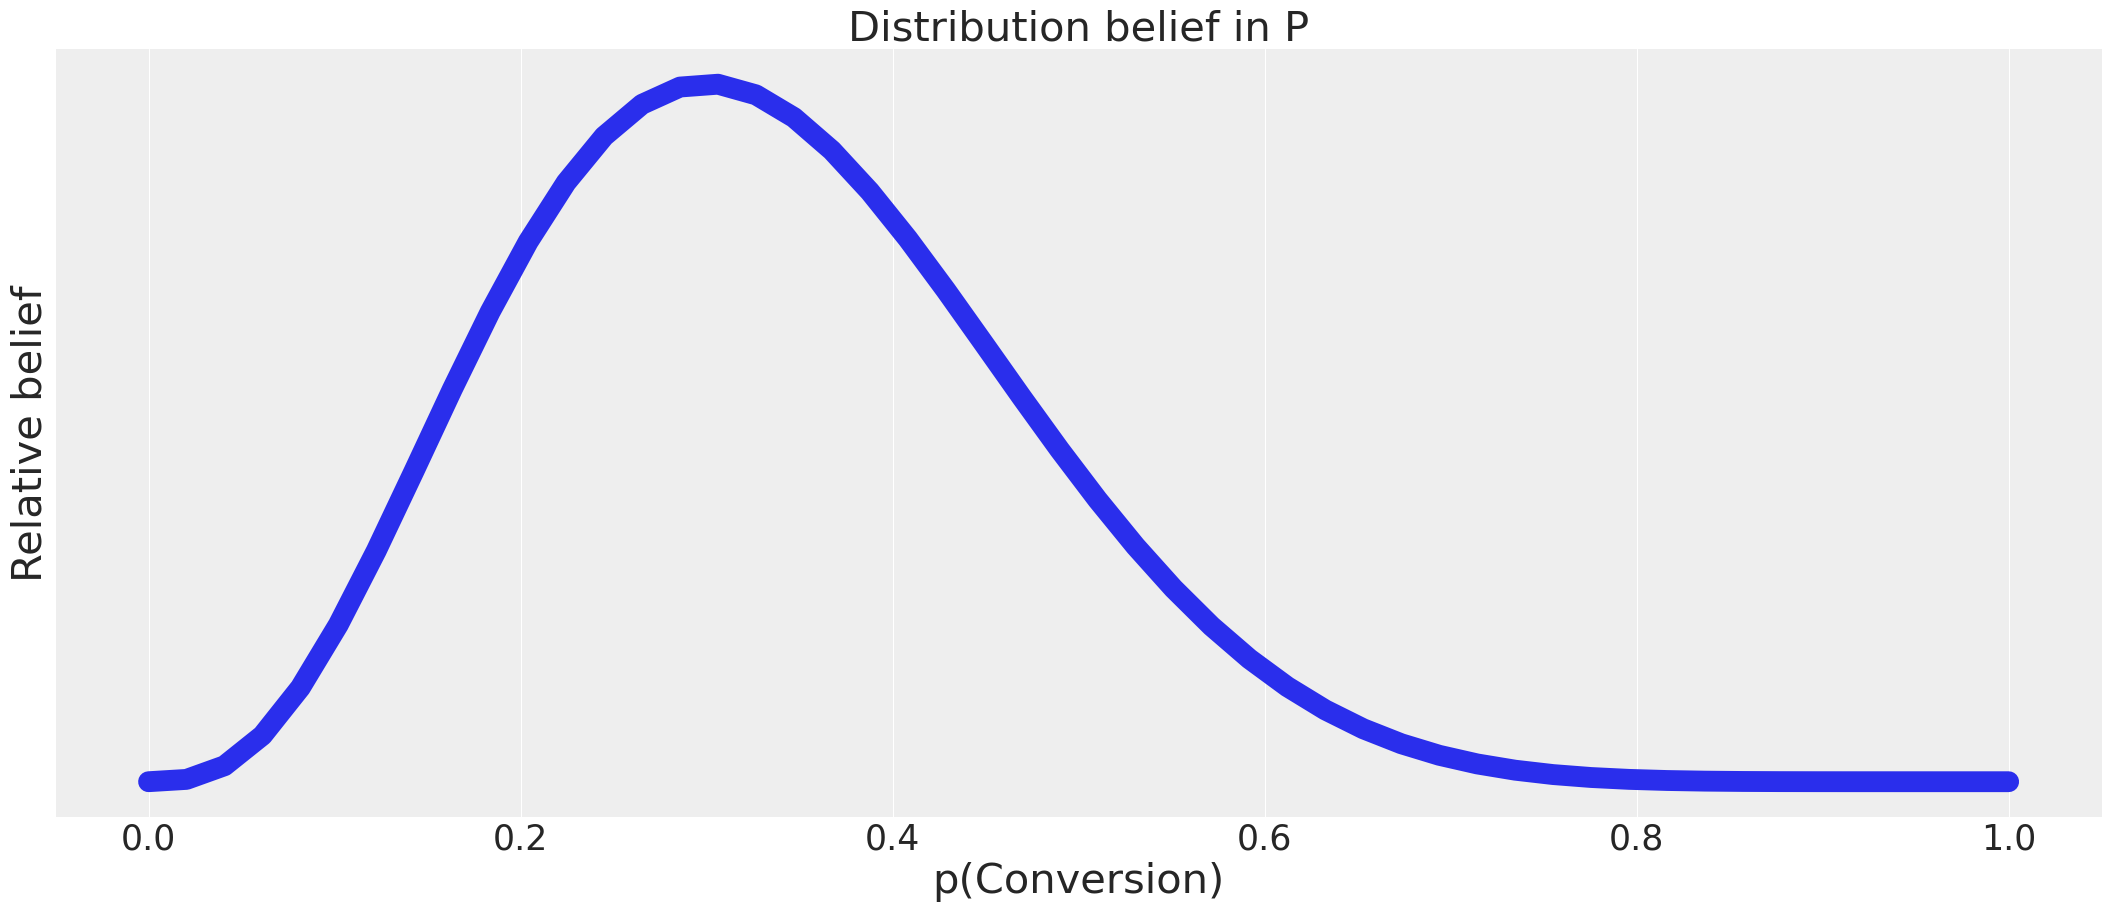

In [46]:
x = np.linspace(0, 1)
y = beta_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)

ax.set_yticks([])
ax.set_title("Distribution belief in P", fontsize=30)
ax.set_xlabel("p(Conversion)", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)

# Relative height is what matters in PDFs
PDFs that take in a value, and output the relative *likelihood* of that value occurring given a distribution.

In [54]:
 beta_dist.pdf(.3), beta_dist.pdf(.5)

(2.9351072519999977, 1.2890625)

The numbers were are telling us that probability value of conversion of 30% is more likely than one of 50% given our distribution.

# 🤔 PDF is not probabillity
The probability of of any single number in a continuous distribution is **0**,

This is because of the foundational way mathematical measure theory works. In a continuous distribution any single number is infinitely small so it can't have mass. We can get the probability for a *range* of numbers but that's not important for this course.

# Visual representation of PDF and relative heights
The red lines represent the PDF value of 30% cm and 50% cm

[None]

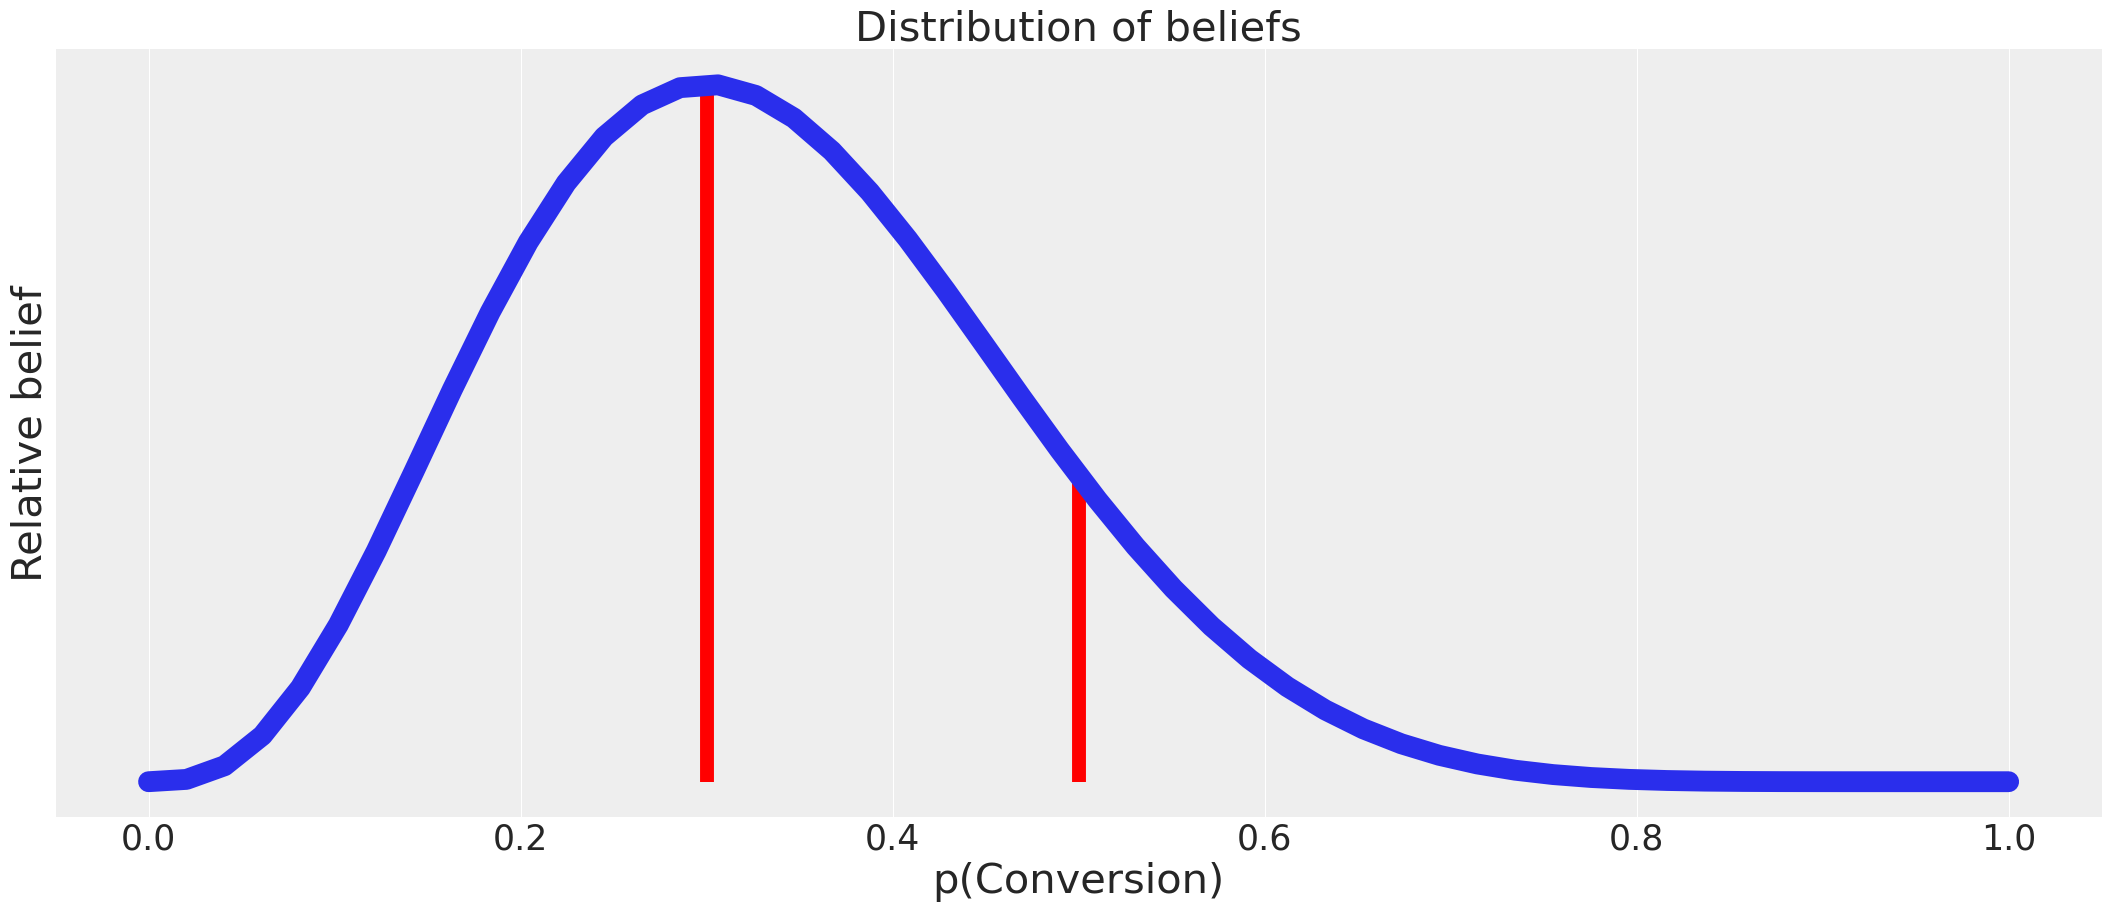

In [49]:
x = np.linspace(0, 1)
y = beta_dist.pdf(x)

fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)
ax.set_yticks([])
ax.set_title("Distribution of beliefs", fontsize=30)
ax.set_xlabel("p(Conversion)", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
markerline, stemline, baseline = ax.stem(.3, beta_dist.pdf(.3), "r")
plt.setp(stemline, linewidth = 10)

markerline, stemline, baseline = ax.stem(.5, beta_dist.pdf(.5), "r")
plt.setp(stemline, linewidth = 10)


By checking this plot its much easier to see the relative likelihood of the two p values

# What is Log PDF
Its just the PDF value but transformed into the log scale. 

This is done for purely computational stability reasons. Again this is a computational detail that is not important to understand up front. We bring this up as you may hear the term logpdf and don't want it to surprise you.

So be aware you may see the the terms pdf, and logpdf. Just translate that in your head as "a thing that gives me relative likelihoods of seeing a certain value"

In [52]:
np.log(beta_dist.pdf(.3)), beta_dist.logpdf(.5)

(1.0767439950314812, 0.2539152099809643)

# Section Recap
* Probability Mass and Density functions tell us how the probability of observations is *spread* across a range of possible values
* If we have a possible value, we can use PMF and PDF to tell us the relative likelihood of occurrence of that value, versus any other value *That's all you need to takeaway*
* Log PDF the same concept, just with a mathematical transform applied
